# Python绘图-Matplotlib&plotnine

## Matplotlib

[Matplotlib常用函数](https://www.jianshu.com/p/da385a35f68d)

In [3]:
import numpy as np
from matplotlib import pyplot as plt

Matplotlib <- matlab <- 与Matlab的画图思路相近    
画图时主要使用pyplot这个模块，习惯命名为plt  

### 基本形式：
#### plt.plot(x,y)    
#### plt.plot(y)--y为一个序列，此时x轴为0到n-1的整数，n为y序列长度

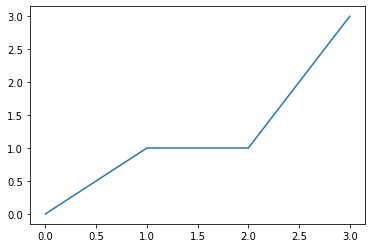

In [156]:
#x=[0,1,7,5]
y=[0,1,1,3]
plt.plot(y)#形成了一个图像
#plt.show()
#plt.xlim(0,10)

#bar,scatter

如何画出好看的图?详见：
[Matplotlib Gallery](https://matplotlib.org/gallery/index.html) 

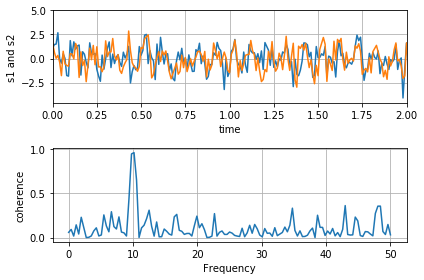

In [57]:
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

·  
·  
·   
·  
·  
  
    
      
       






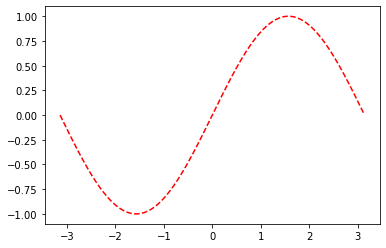

In [152]:
#实例一：一个图里有一条曲线
x1=np.arange(-np.pi,np.pi,0.01)
x2=np.sin(x1)
plt.plot(x1,x2,'r--')

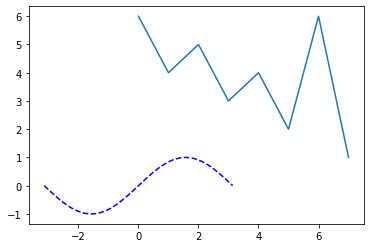

In [29]:
#实例二：一个图里有两个曲线
x1=np.arange(-np.pi,np.pi,0.01)
x2=np.sin(x1)
x3=[6,4,5,3,4,2,6,1]
plt.plot(x1,x2,'b--')
plt.plot(x3)

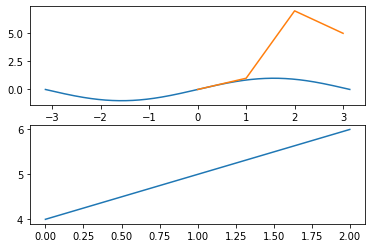

In [157]:
#实例三：有两张图，每张图有一个曲线
plt.figure(1)                # the first figure
plt.subplot(2,1,1)             # the first subplot in the first figure
plt.plot(x1,x2)
plt.plot(x)
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])

d:\baidunetdiskdownload\python\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


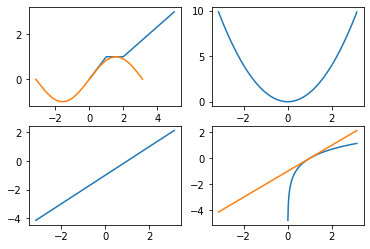

In [48]:
#实例四：有四张图，有的图有两个曲线

y1 = x1**2
y2 = x1-1
y3 = np.log(x1)
a1=plt.subplot(2,2,1)
a1.plot(x,y)
plt.plot(x1,x2)

a2=plt.subplot(2,2,2)
a2.plot(x1,y1)

a3=plt.subplot(2,2,3)
a3.plot(x1,y2)

a4=plt.subplot(224)
a4.plot(x1,y3)
plt.plot(x1,y2)
#a2.plot(x1,y1)

d:\baidunetdiskdownload\python\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


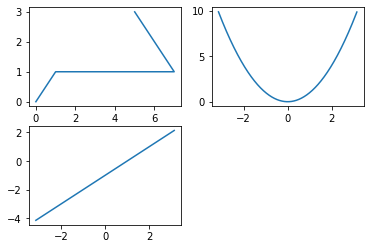

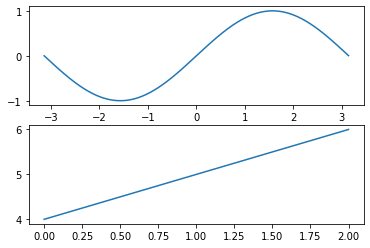

In [158]:
#实例五：有多张图，有的图有两个曲线
plt.figure(1)
y1 = x1**2
y2 = x1-1
y3 = np.log(x1)
a1=plt.subplot(2,2,1)
a1.plot(x,y)
plt.plot(x1,x2)


a2=plt.subplot(2,2,2)
a2.plot(x1,y1)

a3=plt.subplot(2,2,3)
a3.plot(x1,y2)

#a4=plt.subplot(224)
#a4.plot(x1,y3)
#plt.plot(x1,y2)

plt.figure(2)
plt.subplot(211)            
plt.plot(x1,x2)
plt.subplot(212)             
plt.plot([4, 5, 6])

**<font color = red>【用matplotlib最大的疑惑——我到底在哪张图上画画？】</font>**

### （一）重要概念

### 【图层】

通过matplotlib画图的过程相当于在画布上一层一层增加图像、标注的过程  

#### 1.容器层

容器层主要由Canvas、Figure、Axes组成  

· Canvas：底层的系统层，在绘图的过程中充当画板的角色，即放置Figure（绘图区）的工具  
· Figure：Canvas上方的第一层，在绘图的过程中充当画布的角色，可以通过plt.figure()设置画布的大小和分辨率等  
· Axes：Canvas上方第二层，Figure上方第一层，在绘图的过程中相当于画布上的绘图区的角色。Axes包含多个Axis(坐标轴)，Axis指坐标系中的一条轴，包含大小限制、刻度和刻度标签  

包含关系：  
· 一个figure(画布)可以包含多个axes(坐标系)，但是一个axes只能属于一个figure  
· 一个axes可以包含多个axis(坐标轴)，包含两个即为2d坐标系，3个即为3d坐标系  

注:  
Figure：面板(图)，matplotlib中的所有图像都是位于figure对象中，一个图像只能有一个figure对象。  
Subplot：子图，figure对象下创建一个或多个axes对象(可用函数subplot设定)用于绘制图像。  
在绘图结构中，figure创建窗口，subplot创建子图。所有的绘画只能在子图上进行。

![Image of Yaktocat](https://img-blog.csdnimg.cn/20190307195701895.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQyNjQyOTQ1,size_16,color_FFFFFF,t_70)

#### 2.辅助显示层

辅助显示层为Axes(绘图区)内的除了根据数据绘制出的图像以外的内容，主要包括

· Axes外观(facecolor)  
· 边框线(spines)  
· 坐标轴(axis)  
· 坐标轴名称(axis label)  
· 坐标轴刻度(tick)  
· 坐标轴刻度标签(tick label)  
· 网格线(grid)  
· 图例(legend)  
· 标题(title)   

![Image of Yaktocat](https://img-blog.csdnimg.cn/20190307200054155.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQyNjQyOTQ1,size_16,color_FFFFFF,t_70)

#### 3.图像层

图像层指Axes内通过  
· plot（折线图）  
· scatter（散点图）  
· bar（柱状图）  
· histogram（直方图）  
· pie（饼图） 等函数根据数据绘制出的图像

![Image of Yaktocat](https://img-blog.csdnimg.cn/20190307200222723.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQyNjQyOTQ1,size_16,color_FFFFFF,t_70)

### 【当前图像】

plt.plot() <-- plt -- 即指在当前图像上操作  
a1.plot() <-- 指在a1这个图像上操作

注：在jupyter notebook这种交互模式下，不需要用plt.show()也可以直接看到图像

### （二）创建图像的方法

#### 1.简单粗暴画图法

Text(0.5, 1.0, '一张图')

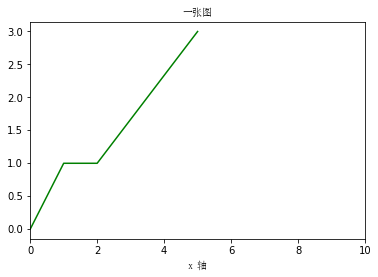

In [162]:
#并未事先指定figure、axes时，默认创建一张新的图
x=[0,1,2,5]
y=[0,1,1,3]
plt.plot(x,y,'g')#可设置曲线的颜色、形状、是否显示数值等
plt.xlim(0,10)
plt.xlabel("x 轴",fontproperties='SimSun')#可用来设置字体、字号等
plt.title('一张图',fontproperties='SimSun')

#### 2.按部就班画图法

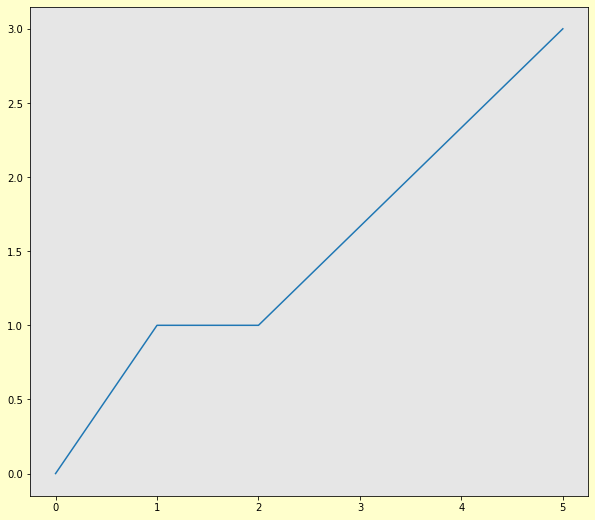

In [164]:
xx=[0,1,2,5]
yy=[0,1,1,3]
#首先指定画布，可通过设置参数figsize来确定大小
plt.figure(figsize=(10,9),facecolor='#ffffcc',edgecolor='#ffffcc')
plt.subplot(111, facecolor='#e6e6e6')
plt.plot(xx,yy)
plt.show()

#### 3.按部就班又不失活泼画法

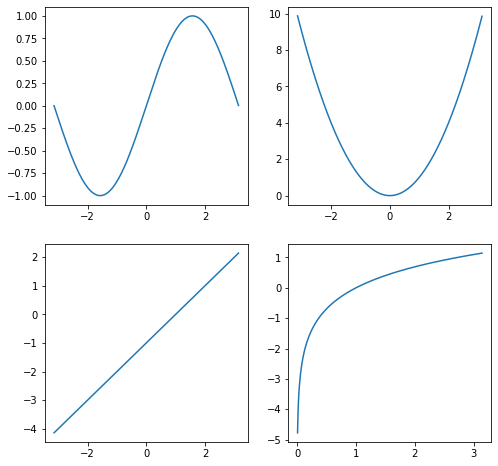

In [170]:
f, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0].plot(x1,x2)
axes[0,1].plot(x1,y1)
axes[1,0].plot(x1,y2)
axes[1,1].plot(x1,y3)


### （三）Matplotlib实例

[Matplotlib常用函数](https://www.jianshu.com/p/19a2613396ff)

(1, 10)

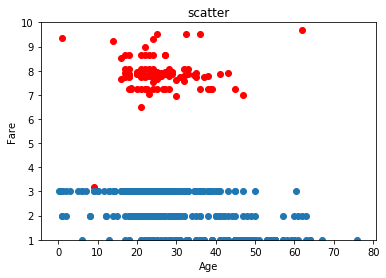

In [177]:
#散点图
plt.scatter(df_1['Age'],df_1['Fare'],color = 'r')
plt.scatter(df_1['Age'],df_1['Pclass'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('scatter')
plt.ylim(1,10)

(0, 4)

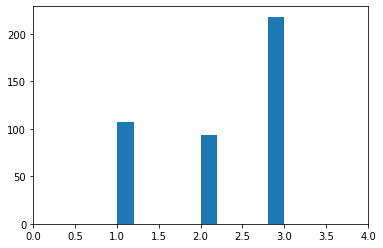

In [101]:
#直方图
plt.hist(df_1['Pclass'])
plt.xlim(0,4)

## ggplot (plotnine)

[ggplot常用函数](https://blog.csdn.net/weixin_42628425/article/details/89786545)

In [84]:
from plotnine import *

在jupyter里安装时应是 !pip install plotnine 这一个包

· ggplot 支持的数据格式必须是数据框格式，即pandas.DataFrame  
· 绘制统计图就是从数据到集合对象（geometric object，缩写为geom，包括点、线、条形等）的图形属性  
· 图形层次主要分为三个图形层：  
·· 1）数据层（必须存在的图形层）  
·· 2）几何图形层（即想要绘图的图形类型，也是必须存在的图形层）  
·· 3）美化层（作用是图形美化）  

图层使用方法：  
1）不同的图层用“+”号叠加  
2）图层的组成部分  
····1 > 数据和图形属性映射  
····2 > 一种统计变换，即数据的变换，比如求组平均，求对数等  
····3 > 一种几何对象  
····4 > 一种位置调整方式  
3）图层概念的优点  
····1 > 在操作了叠加新的图层，修改统计变换之后，之前的数据依然可以使用  
····2 > 在通过各种图形的叠加能够实现完成其他画图包很难完成的图形  
不同的图层中，要满足图形的绘制，图层最少有一个数据层，一个几何图形层，而在进行绘图时，可以加入几个图形层，几个数据层，外层的内容会加入到内层的上一层

### 基本操作

ggplot(data, aes(x, y)) -- 给参数data里传入数据，x里传入横坐标数据，y里传入纵坐标数据，即可画出一个空白框图  
geom_point()，散点图；  
geom_line()，折线图；  
geom_point() + geom_line()，折线散点图；
geom_area()，面积图：ggplot(aes(x='', ymin='', ymax='')，data) + geom_area();  
geom_bar()，柱状图；  
geom_density()，概率密度函数图；

添加线条：  
· stat_smooth(color='blue')，添加趋势线；  
· geom_abline(intercept, slope, color, size)，添加斜线，intercept确定截距，slope确定斜率，效果类似于stat_smooth();  
· geom_hline(yintercept, color, size)，添加水平线，yintercept确定水平线的位置，color确定颜色，size确定线条宽度；  
· geom_vline(xintercept, color, size)，添加垂线；  

添加统计方法（统计变换再数据被提取出来之前对数据进行聚合和其他计算）：  
· stat_abline	添加线条，用斜率和截距表示  
· stat_bin	分割数据，然后绘制直方图  
· stat_identity	绘制原始数据，不进行统计变化  

添加标签：  
· labs	设置所有的标签和标题  
· xlab	设置x轴标签  
· ylab	设置y轴标签  
· ggtitle	创建图表标题  

分列与分行：  
单变量
facet_wrap(facets, nrow = NULL, ncol = NULL, scales = "fixed", shrink = TRUE, as.table = TRUE, drop = TRUE)  
双变量
facet_grid(facets, margins = FALSE, scales = "fixed", space = "fixed", shrink = TRUE, labeller = "label_value", as.table = TRUE, drop = TRUE)

### 重要概念

 aes()函数是ggplot2中的映射函数, 所谓的映射即为数据集中的数据关联到相应的图形属性过程中一种对应关系  


### 实例:

In [88]:
df_1 = pd.read_csv('test.csv')
df_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


d:\baidunetdiskdownload\python\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
d:\baidunetdiskdownload\python\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 87 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


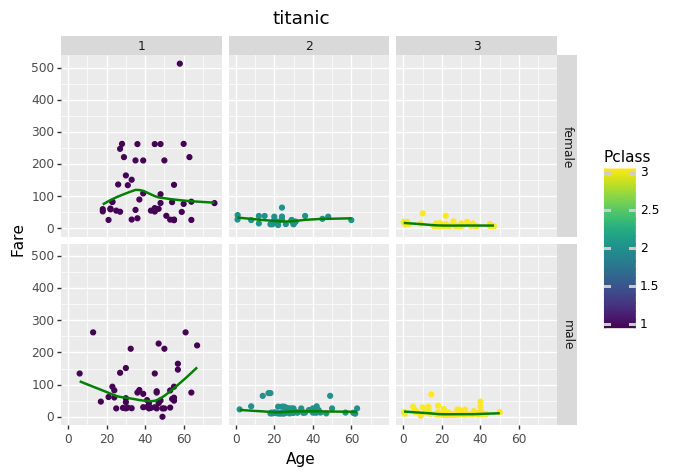

<ggplot: (34813045)>

In [195]:
ggplot(df_1,aes(x='Age',y='Fare',color='Pclass',group='Pclass'))+geom_point()+ggtitle('titanic')+stat_smooth(color='green')+facet_grid('Sex~Pclass')

In [ ]:
#分组与填充
ggplot(df_1,aes(x='Age',y='Fare'))+ geom_point()

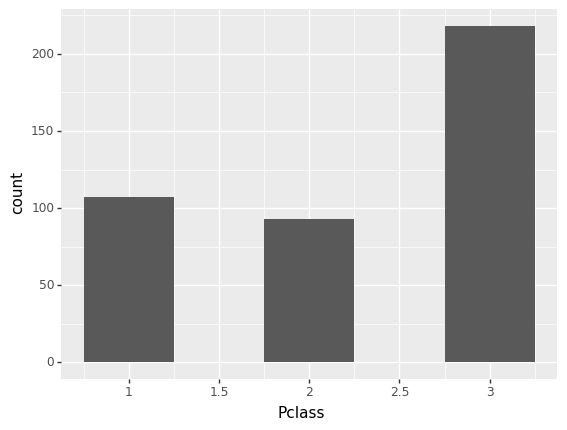

<ggplot: (33647359)>

In [186]:
ggplot(df_1)+aes('Pclass')+stat_bin(bins = 5
                                   ) 

d:\baidunetdiskdownload\python\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_ydensity : Removed 86 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
d:\baidunetdiskdownload\python\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_boxplot : Removed 86 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


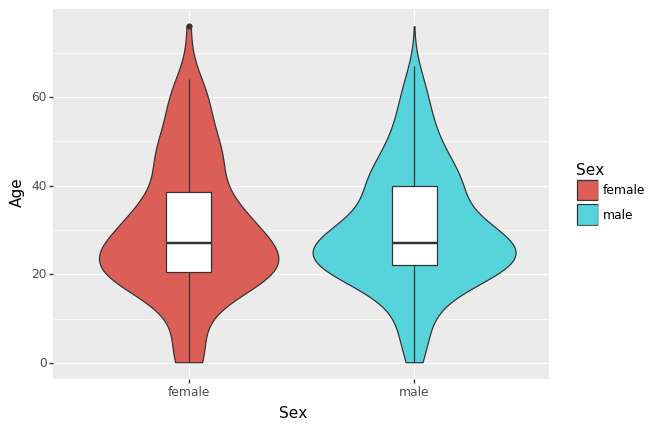

<ggplot: (20966095)>

In [124]:
#小提琴图
ggplot(df_1,aes(x='Sex',y='Age'))+geom_violin(aes(fill = 'Sex'),trim = False)+geom_boxplot(width = 0.2)

d:\baidunetdiskdownload\python\lib\site-packages\plotnine\layer.py:433: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)


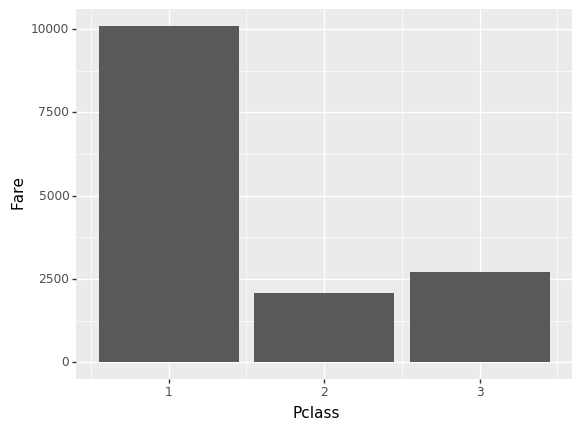

<ggplot: (34862269)>

In [137]:
ggplot(df_1,aes(x='Pclass',y='Fare'))+ geom_bar(stat='identity')

d:\baidunetdiskdownload\python\lib\site-packages\plotnine\layer.py:433: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)


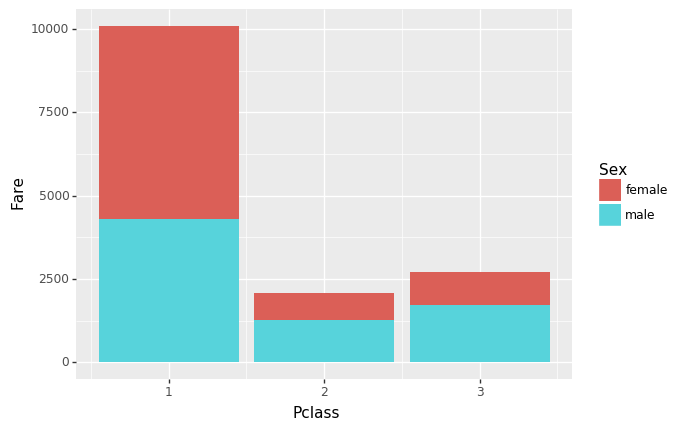

<ggplot: (20651771)>

In [133]:
#堆积柱形图
ggplot(df_1,aes(x='Pclass',y='Fare',fill = 'Sex'))+ geom_bar(stat='identity')